In [2]:
from google.colab import files
# Uploading the file
uploaded = files.upload()
import pandas as pd
# Loading the CSV file
df = pd.read_csv("OnlineRetail.csv")
# Display the first 5 rows
df.head()


Saving OnlineRetail.csv to OnlineRetail.csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
# Data types and information about null values
print(df.info())

# Summary of missing values in each column
print(df.isnull().sum())

# Number of rows and columns
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
(541909, 8)


In [4]:
# Quantity that is zero or negative
print(df[df['Quantity'] <= 0].shape)

# UnitPrice that is zero or negative
print(df[df['UnitPrice'] <= 0].shape)


(10624, 8)
(2517, 8)


In [5]:
# Data cleaning: removing rows with missing values or invalid (negative/zero) entries
df = df.dropna(subset=['CustomerID', 'Description'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Summary after cleaning
print(df.shape)


(397884, 8)


In [6]:
# Converting the InvoiceDate column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)


In [7]:
# Creating Year and Month columns
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
# Displaying the new columns
df[['InvoiceDate', 'Month', 'Year']].head()


,InvoiceDate,Month,Year
0,2010-12-01 08:26:00,12,2010
1,2010-12-01 08:26:00,12,2010
2,2010-12-01 08:26:00,12,2010
3,2010-12-01 08:26:00,12,2010
4,2010-12-01 08:26:00,12,2010


In [8]:
# Creating the TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Displaying a sample
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34


In [9]:
# Summary of missing values after cleaning
print(df.isnull().sum())

# Check if any Quantity <= 0 or UnitPrice <= 0 remain
print((df['Quantity'] <= 0).sum())
print((df['UnitPrice'] <= 0).sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
TotalPrice     0
dtype: int64
0
0


In [10]:
# Customers who spend the most
# Grouping by CustomerID and summing TotalPrice
TotalSpent = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

# Displaying the top 10 highest-spending customers
TotalSpent.reset_index().head(10)


,CustomerID,TotalPrice
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06
5,12415.0,124914.53
6,14156.0,117379.63
7,17511.0,91062.38
8,16029.0,81024.84
9,12346.0,77183.60


In [11]:
# Total number of products purchased by each customer
# Summing Quantity per customer and sorting from highest to lowest
TotalQuantity = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)

# Displaying the top 10 customers by total quantity purchased
TotalQuantity.reset_index().head(10)

,CustomerID,Quantity
0,14646.0,196915
1,16446.0,80997
2,14911.0,80265
3,12415.0,77374
4,12346.0,74215
5,17450.0,69993
6,17511.0,64549
7,18102.0,64124
8,13694.0,63312
9,14298.0,58343


In [12]:
# Number of purchases per customer
# Counting unique invoices for each customer and sorting from highest to lowest
NumInvoices = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# Displaying the top 10 customers by number of invoices
NumInvoices.reset_index().head(10)


,CustomerID,InvoiceNo
0,12748.0,209
1,14911.0,201
2,17841.0,124
3,13089.0,97
4,14606.0,93
5,15311.0,91
6,12971.0,86
7,14646.0,73
8,16029.0,63
9,13408.0,62


In [13]:
# Average number of products per purchase (invoice) for each customer
AvgProductsPerPurchase = (df.groupby(['CustomerID', 'InvoiceNo'])['Quantity'].sum().groupby('CustomerID').mean().sort_values(ascending=False))

# Displaying the top 10 customers by average products per purchase
AvgProductsPerPurchase.reset_index().head(10)

,CustomerID,Quantity
0,12346.0,74215.000000
1,16446.0,40498.500000
2,18251.0,7824.000000
3,15749.0,6009.333333
4,13135.0,4300.000000
5,16754.0,4280.000000
6,12415.0,3684.476190
7,12688.0,3028.000000
8,15372.0,2924.000000
9,13027.0,2880.000000


In [14]:
# Average purchase amount per customer
# Calculating the total purchase per invoice, then averaging per customer and sorting from highest to lowest
AvgPurchase = df.groupby(['CustomerID', 'InvoiceNo'])['TotalPrice'].sum().groupby('CustomerID').mean().sort_values(ascending=False)

# Displaying the top 10 customers by average purchase amount
AvgPurchase.reset_index().head(10)

,CustomerID,TotalPrice
0,16446.0,84236.250000
1,12346.0,77183.600000
2,15749.0,14844.766667
3,15098.0,13305.500000
4,12357.0,6207.670000
5,12415.0,5948.310952
6,12590.0,4932.130000
7,12688.0,4873.810000
8,12752.0,4366.780000
9,18102.0,4327.621667


In [15]:
# Total revenue generated by each country
# Grouping by Country and summing TotalPrice
TotalSpentByCountry = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Displaying the top 10 countries by revenue
TotalSpentByCountry.reset_index().head(10)

,Country,TotalPrice
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


In [16]:
# Number of unique customers from each country
# Grouping by Country and counting unique CustomerID values
UniqueCustomersByCountry = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

# Displaying the top 10 countries
print(UniqueCustomersByCountry)

Country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Australia                  9
Denmark                    9
Netherlands                9
Channel Islands            9
Japan                      8
Sweden                     8
Cyprus                     8
Poland                     6
Unspecified                4
USA                        4
Canada                     4
Greece                     4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Brazil                     1
Lebanon                    1
Iceland                    1
Czech Republic             1
European Community         1
Saudi Arabia               1
RSA   

In [17]:
# Total purchases for each month
# Grouping by month and summing TotalPrice
PurchasePerMonth = df.groupby('Month')['TotalPrice'].sum().sort_values(ascending=False)
print(PurchasePerMonth)

Month
11    1161817.380
12    1090906.680
10    1039318.790
9      952838.382
5      678594.560
6      661213.690
8      645343.900
7      600091.011
3      595500.760
1      569445.040
4      469200.361
2      447137.350
Name: TotalPrice, dtype: float64


In [18]:
# Total purchases by month and year
MonthlyAndYearlySales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().sort_values(ascending=False)
print(MonthlyAndYearlySales)

Year  Month
2011  11       1161817.380
      10       1039318.790
      9         952838.382
      5         678594.560
      6         661213.690
      8         645343.900
      7         600091.011
      3         595500.760
2010  12        572713.890
2011  1         569445.040
      12        518192.790
      4         469200.361
      2         447137.350
Name: TotalPrice, dtype: float64


In [19]:
# Creating a single DataFrame with all metrics for each customer
CustomerProfile = pd.DataFrame({'TotalSpent': TotalSpent,'TotalQuantity': TotalQuantity,'NumInvoices': NumInvoices,'AvgQuantityPerInvoice': AvgProductsPerPurchase})

# Displaying the first 10 customers
CustomerProfile.head(10)


,TotalSpent,TotalQuantity,NumInvoices,AvgQuantityPerInvoice
CustomerID,,,,
12346.0,77183.60,74215,1,74215.000000
12347.0,4310.00,2458,7,351.142857
12348.0,1797.24,2341,4,585.250000
12349.0,1757.55,631,1,631.000000
12350.0,334.40,197,1,197.000000
12352.0,2506.04,536,8,67.000000
12353.0,89.00,20,1,20.000000
12354.0,1079.40,530,1,530.000000
12355.0,459.40,240,1,240.000000


/tmp/ipython-input-21831432.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TopCustomers.index.astype(str), y=TopCustomers.values, palette='viridis')


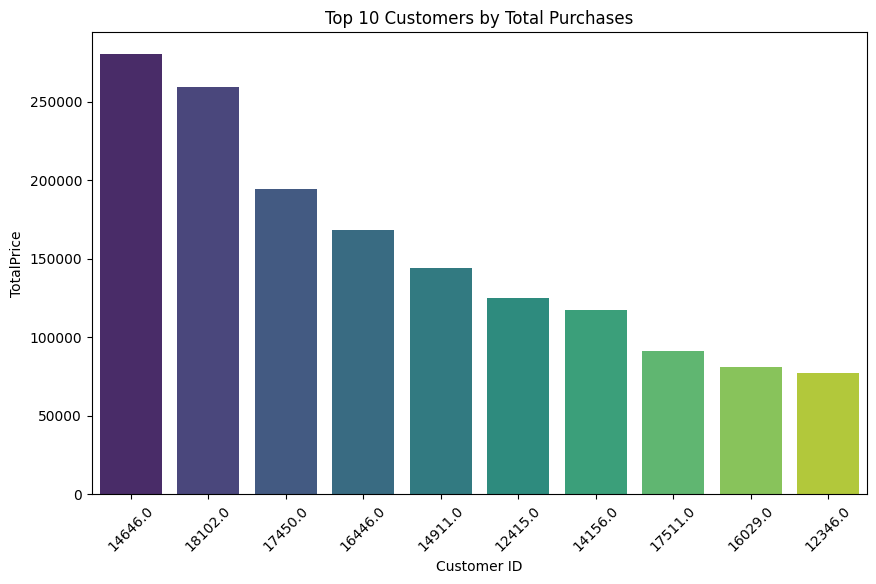

/tmp/ipython-input-21831432.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TopQuantity.index.astype(str), y=TopQuantity.values, palette='magma')


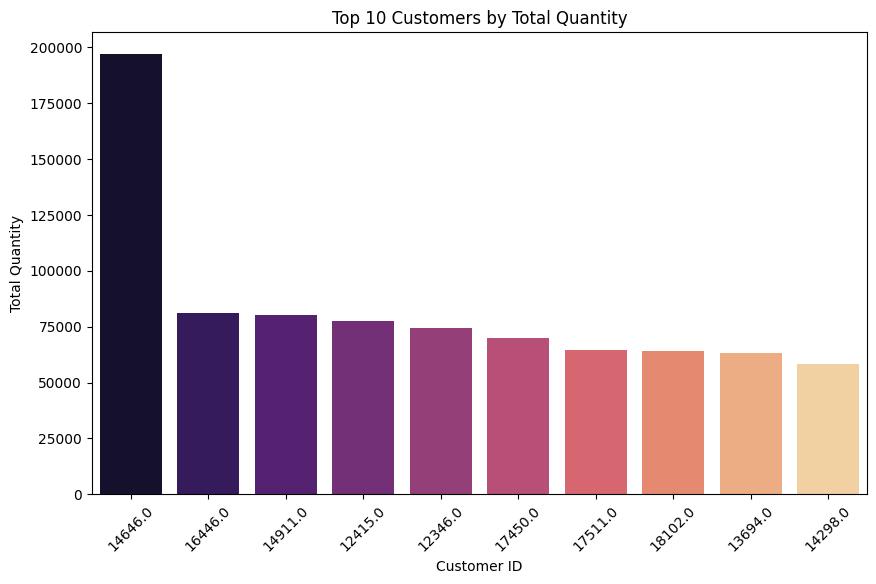

/tmp/ipython-input-21831432.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TopInvoices.index.astype(str), y=TopInvoices.values, palette='coolwarm')


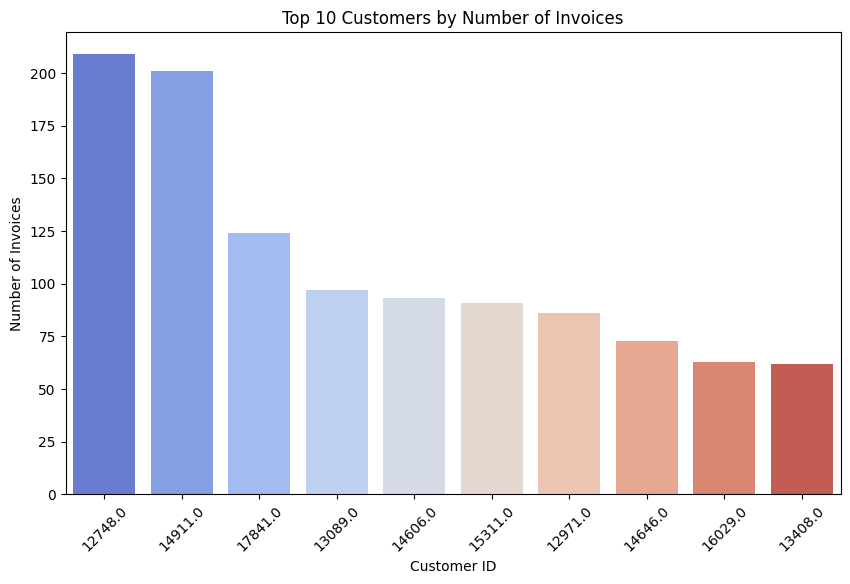

/tmp/ipython-input-21831432.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TopCountries.index, y=TopCountries.values, palette='Spectral')


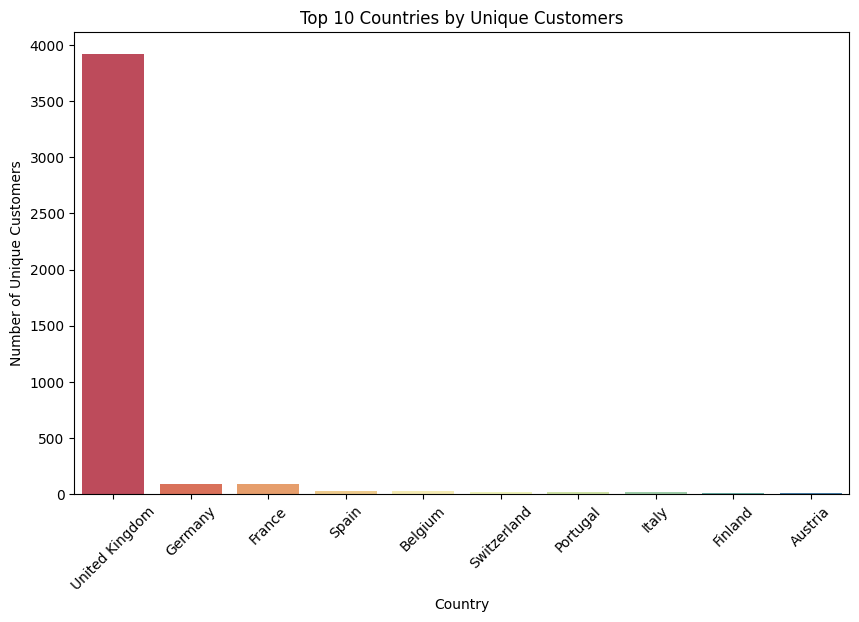

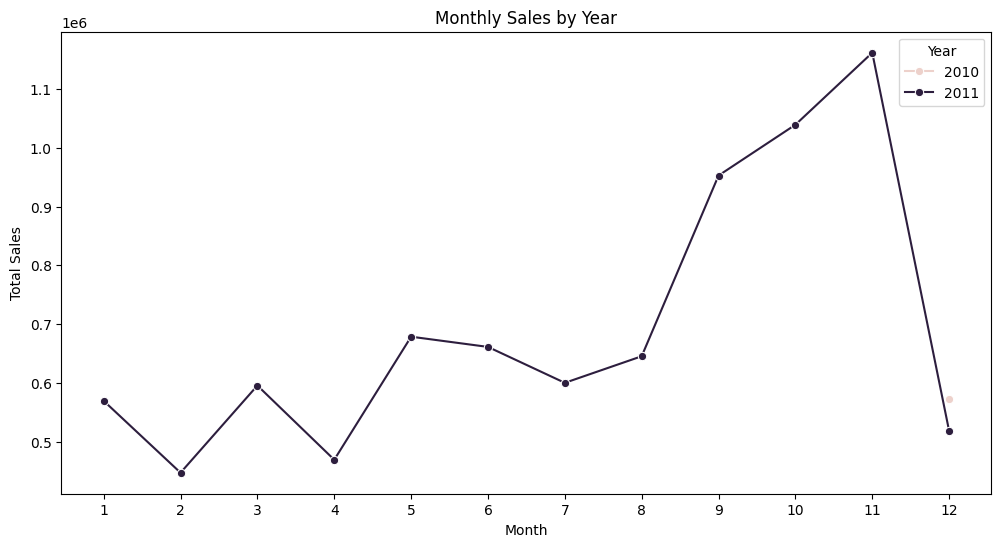

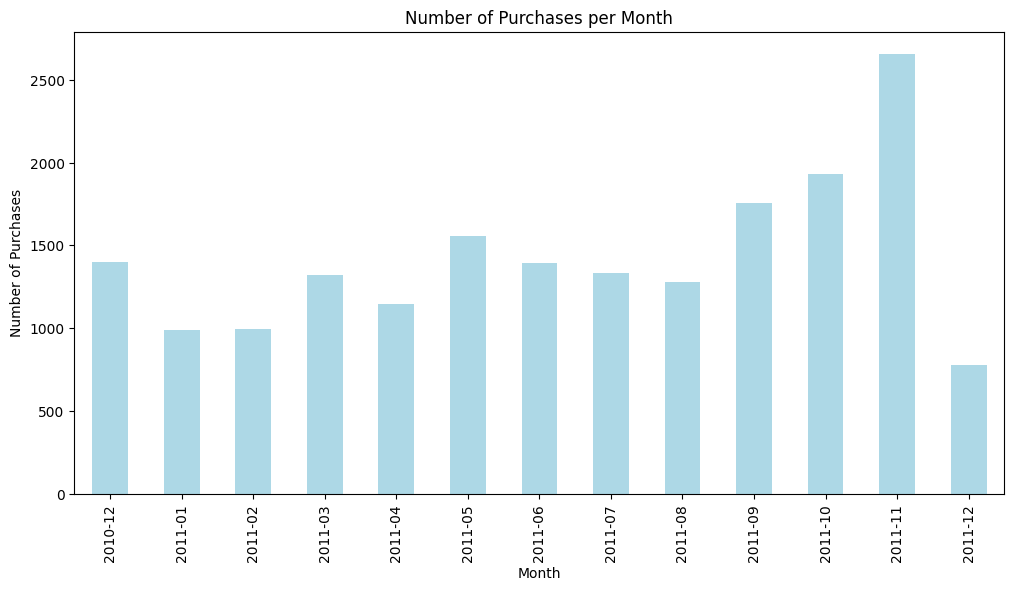

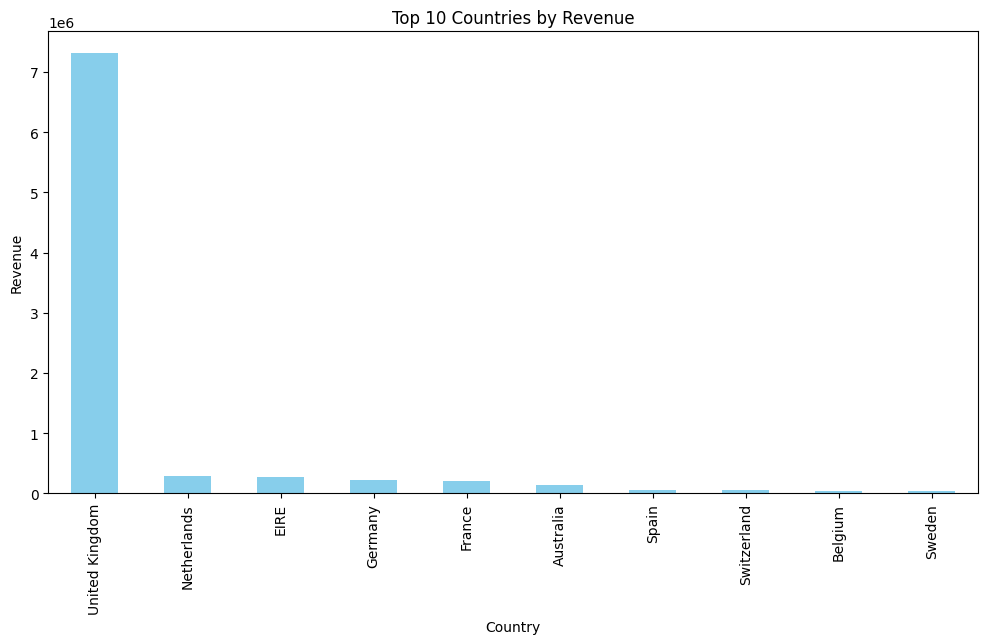

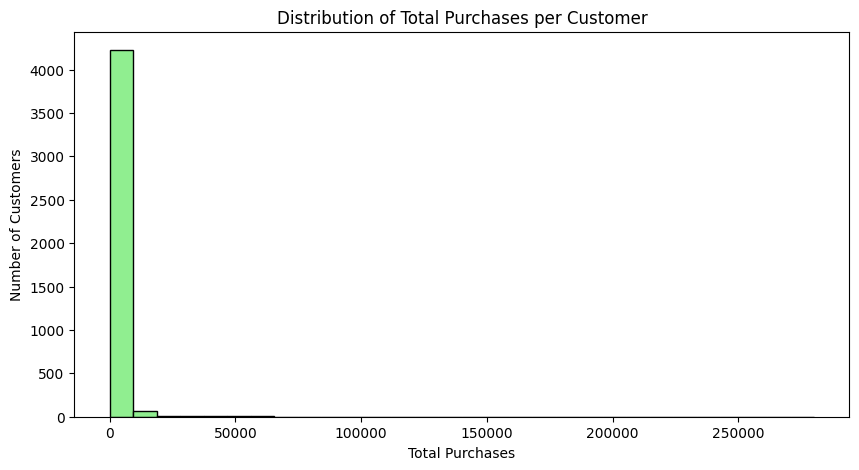

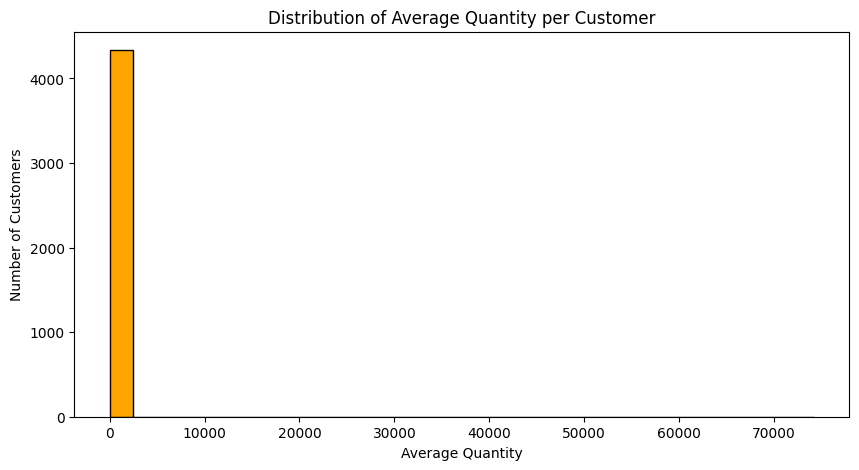

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 customers by total spending
TopCustomers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=TopCustomers.index.astype(str), y=TopCustomers.values, palette='viridis')
plt.title("Top 10 Customers by Total Purchases")  # כותרת באנגלית
plt.ylabel("TotalPrice")  # ציר Y באנגלית
plt.xlabel("Customer ID")  # ציר X באנגלית
plt.xticks(rotation=45)
plt.show()

# Top 10 customers by total quantity purchased
TopQuantity = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=TopQuantity.index.astype(str), y=TopQuantity.values, palette='magma')
plt.title("Top 10 Customers by Total Quantity")
plt.ylabel("Total Quantity")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()

# Top 10 customers by number of unique invoices
TopInvoices = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=TopInvoices.index.astype(str), y=TopInvoices.values, palette='coolwarm')
plt.title("Top 10 Customers by Number of Invoices")
plt.ylabel("Number of Invoices")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()

# Top 10 countries by number of unique customers
TopCountries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=TopCountries.index, y=TopCountries.values, palette='Spectral')
plt.title("Top 10 Countries by Unique Customers")
plt.ylabel("Number of Unique Customers")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# Monthly sales by year
MonthlySales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=MonthlySales, x='Month', y='TotalPrice', hue='Year', marker='o')
plt.title("Monthly Sales by Year")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(range(1,13))
plt.show()

# Number of purchases per month
PurchasePerMonth = df.groupby(df['InvoiceDate'].dt.to_period('M'))['InvoiceNo'].nunique()

plt.figure(figsize=(12,6))
PurchasePerMonth.plot(kind='bar', color='lightblue')
plt.title("Number of Purchases per Month")
plt.ylabel("Number of Purchases")
plt.xlabel("Month")
plt.show()

# Top 10 countries by revenue
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
country_revenue.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.show()

# Distribution of total purchases per customer (Histogram)
customer_avg = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
plt.hist(customer_avg, bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Total Purchases per Customer")
plt.xlabel("Total Purchases")
plt.ylabel("Number of Customers")
plt.show()

# Distribution of average quantity per customer (Histogram)
avg_items = df.groupby('CustomerID')['Quantity'].mean()

plt.figure(figsize=(10,5))
plt.hist(avg_items, bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Average Quantity per Customer")
plt.xlabel("Average Quantity")
plt.ylabel("Number of Customers")
plt.show()
